Once sequenced, a cancer tumor can have thousands of genetic mutations. But the challenge is distinguishing the mutations that contribute to tumor growth (drivers) from the neutral mutations (passengers). 

Currently this interpretation of genetic mutations is being done manually. This is a very time-consuming task where a clinical pathologist has to manually review and classify every single genetic mutation based on evidence from text-based clinical literature.

For this competition MSKCC is making available an expert-annotated knowledge base where world-class researchers and oncologists have manually annotated thousands of mutations.

We need your help to develop a Machine Learning algorithm that, using this knowledge base as a baseline, automatically classifies genetic variations.


Kaggle is excited to partner with research groups to push forward the frontier of machine learning. Research competitions make use of Kaggle's platform and experience, but are largely organized by the research group's data science team. Any questions or concerns regarding the competition data, quality, or topic will be addressed by them.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train_text = pd.read_csv('../datasets/training_text', sep="\|\|", engine="python", skiprows=1, names=["ID", "Text"])
train_var = pd.read_csv('../datasets/training_variants')

In [26]:
print 'Training Text shape', train_text.shape
print 'Training variants shape', train_var.shape

Training Text shape (3321, 2)
Training variants shape (3321, 4)


In [4]:
train = pd.merge(train_text, train_var, on='ID')
train.drop('ID', axis=1, inplace=True)

In [5]:
train.head()

,Text,Gene,Variation,Class
0,Cyclin-dependent kinases (CDKs) regulate a var...,FAM58A,Truncating Mutations,1
1,Abstract Background Non-small cell lung canc...,CBL,W802*,2
2,Abstract Background Non-small cell lung canc...,CBL,Q249E,2
3,Recent evidence has demonstrated that acquired...,CBL,N454D,3
4,Oncogenic mutations in the monomeric Casitas B...,CBL,L399V,4


In [6]:
train.Class.unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

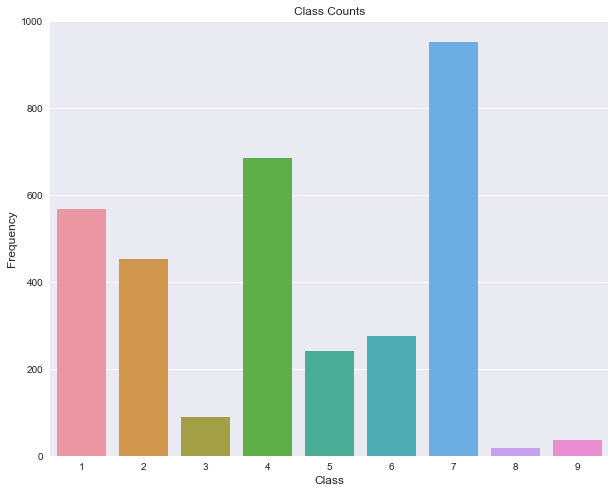

In [73]:
plt.figure(figsize=(10,8))
sns.countplot(x="Class", data=train)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Class Counts', fontsize=12);

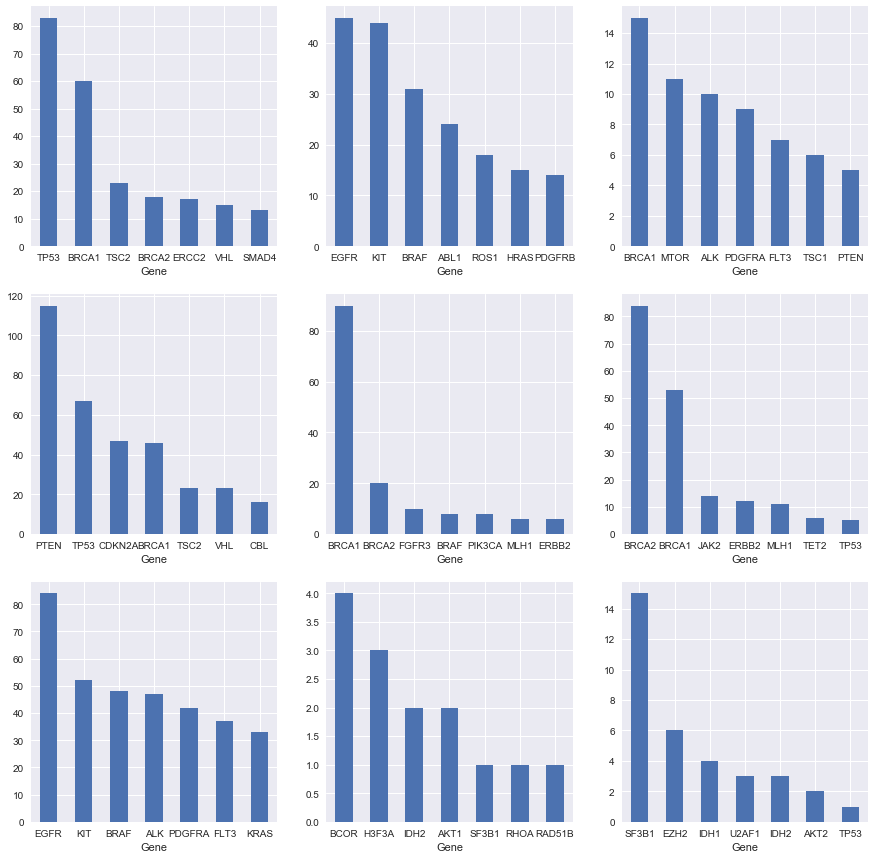

In [94]:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(15,15))


for i in range(3):
    for j in range(3):
        train[train.Class==(i*3 + j + 1)].groupby('Gene')['Text'].count().sort_values(ascending=False).head(7).plot(kind='bar', ax=axes[i][j])
        
for ax in axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(0)